# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 5 - Normalización**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.  

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_resumido.csv", index_col = 0)
df.head(2)

,country,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock
0,Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,112.887108,0.611,2.834056,91.749,24.9,15.4,4.8
1,Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:  

- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste  

 ## Normalización de la variable respuesta con el método manual ## 

In [3]:
media = df["restaurant_price_index"].mean()
maximo = df["restaurant_price_index"].max() 
minimo = df["restaurant_price_index"].min()

In [4]:
df["restaurant_price_index_normal"] = (df["restaurant_price_index"] - media) / (maximo - minimo )

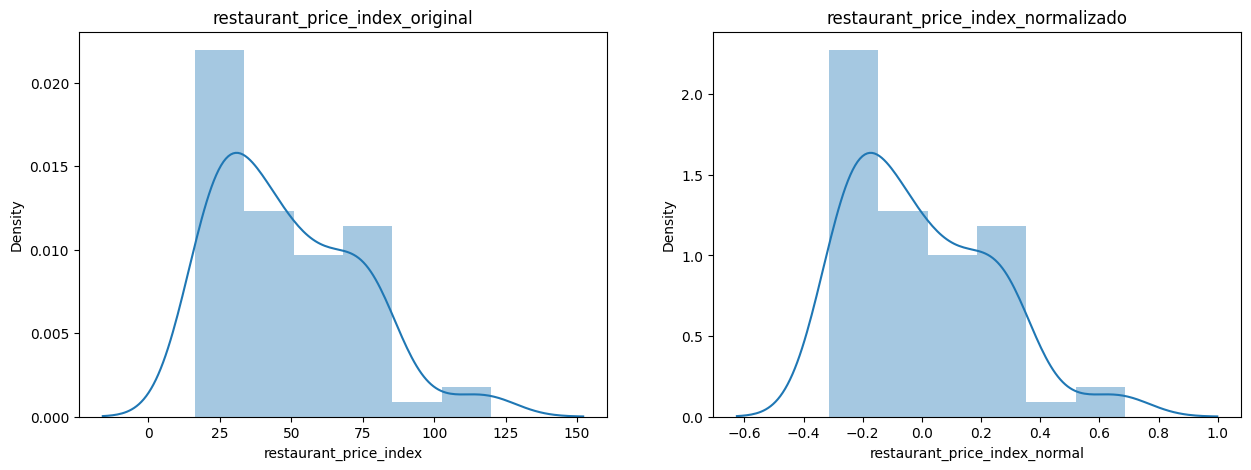

In [5]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [6]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270897527225316)

 ## Normalización de la variable respuesta con el método de transformación logarítmica ## 

In [7]:
df['restaurant_price_index_normal'] = df["restaurant_price_index"].apply(lambda x: np.log(x) if x > 0 else 0)

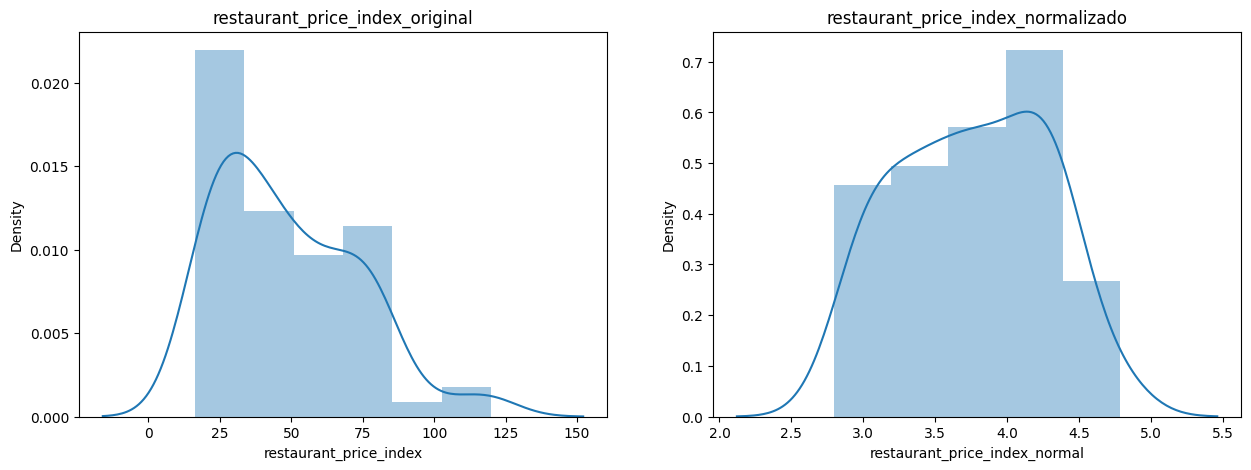

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [9]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.961199939250946, pvalue=0.03725201264023781)

 ## normalización de la variable respuesta con el método de raíz cuadrada ## 

In [10]:
df['restaurant_price_index_normal'] = df['restaurant_price_index'].apply(lambda x: math.sqrt(x))

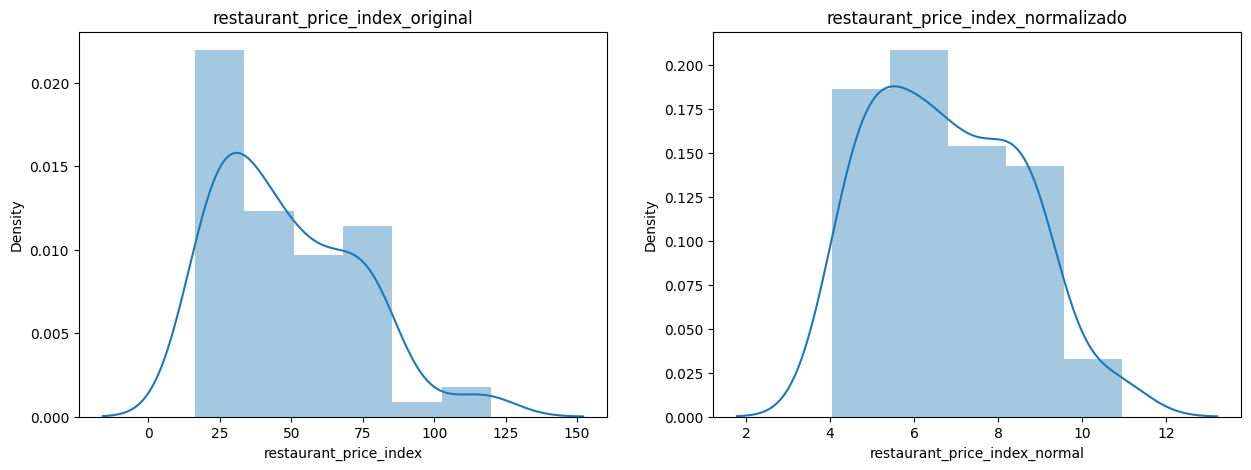

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [12]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9544364213943481, pvalue=0.01651299186050892)

 ## Normalización de la variable respuesta con el método MinMaxScaler ## 

In [13]:
minmax = MinMaxScaler()

In [14]:
minmax.fit(df[['restaurant_price_index']])

MinMaxScaler()

In [15]:
X_normalizadas = minmax.transform(df[["restaurant_price_index"]])

In [16]:
X_normalizadas.min(axis=0)

array([0.])

In [17]:
X_normalizadas.max(axis=0)

array([1.])

In [18]:
numericas_minmax = pd.DataFrame(X_normalizadas, columns = ["restaurant_price_index_normal"])
numericas_minmax.head(2)

,restaurant_price_index_normal
0,0.328501
1,0.587030


In [19]:
df["restaurant_price_index_normal"] = numericas_minmax
df.head(2)

,country,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal
0,Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.3,139.59,58.40,37.37,52.57,112.887108,0.611,2.834056,91.749,24.9,15.4,4.8,0.328501
1,Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.2,176.54,101.94,57.58,80.66,115.686785,0.803,1.948647,85.904,19.0,21.0,28.2,0.587030


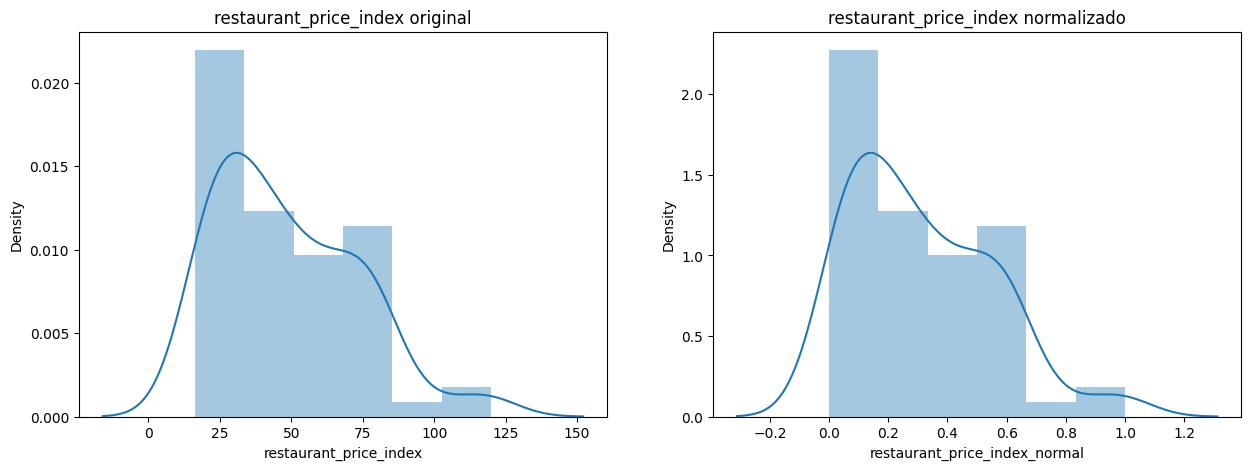

In [20]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index original')
axes[1].set_title('restaurant_price_index normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [21]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9227616786956787, pvalue=0.0005270897527225316)

 ## Normalización de la variable respuesta con el método boxcox ## 

In [22]:
# normalización de la variable respuesta con el método boxcox

df['restaurant_price_index_normal'], lambda_ajustada = stats.boxcox(df['restaurant_price_index'])


In [23]:
lambda_ajustada 

0.04038873152927346

In [24]:
df

,country,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal
0,Argentina,SouthAmerica,50.37,44271.0,2.0,24.8,73.1,5.300000,139.59,58.40,37.37,52.57,112.887108,0.611000,2.834056,91.749,24.9,15.4,4.8,4.246653
1,Australia,Oceania,77.12,24451.0,2.7,21.2,76.1,5.200000,176.54,101.94,57.58,80.66,115.686785,0.803000,1.948647,85.904,19.0,21.0,28.2,4.749998
2,Austria,WesternEurope,66.94,8736.0,4.7,25.6,69.7,5.500000,190.37,95.66,80.75,71.52,113.999737,0.793000,2.081269,58.094,14.1,25.1,17.5,4.581754
3,Belarus,EasternEurope,37.60,9468.0,9.6,32.0,58.4,4.900000,119.23,36.43,77.74,33.84,138.531660,0.694371,6.031837,78.134,16.7,21.3,11.4,3.906126
4,Belgium,WesternEurope,82.34,11429.0,1.2,21.2,77.6,6.600000,160.52,91.02,55.49,75.36,113.128903,0.757000,2.125971,97.961,17.1,24.6,12.3,4.828160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,United Arab Emirates,WesternAsia,63.92,9400.0,3.5,21.1,75.4,-99.000000,139.27,116.77,79.34,67.98,113.302921,0.659000,1.966826,86.248,13.9,2.4,88.4,4.527098
62,United Kingdom,NorthernEurope,76.84,66182.0,1.2,18.4,80.4,5.700000,172.87,96.85,58.81,69.49,114.943592,0.781000,2.557756,83.143,17.7,23.9,13.2,4.745663
63,United States of America,NorthernAmerica,70.02,324460.0,1.5,17.2,81.3,5.400000,179.73,123.17,51.24,75.42,112.411557,0.762000,2.130110,82.058,18.9,21.5,14.5,4.635111
64,Venezuela (Bolivarian Republic of),SouthAmerica,37.34,31977.0,11.9,26.8,61.3,-0.210554,0.00,3.35,14.72,38.30,176.816492,0.522171,7.670487,88.183,27.6,9.9,4.5,3.898093


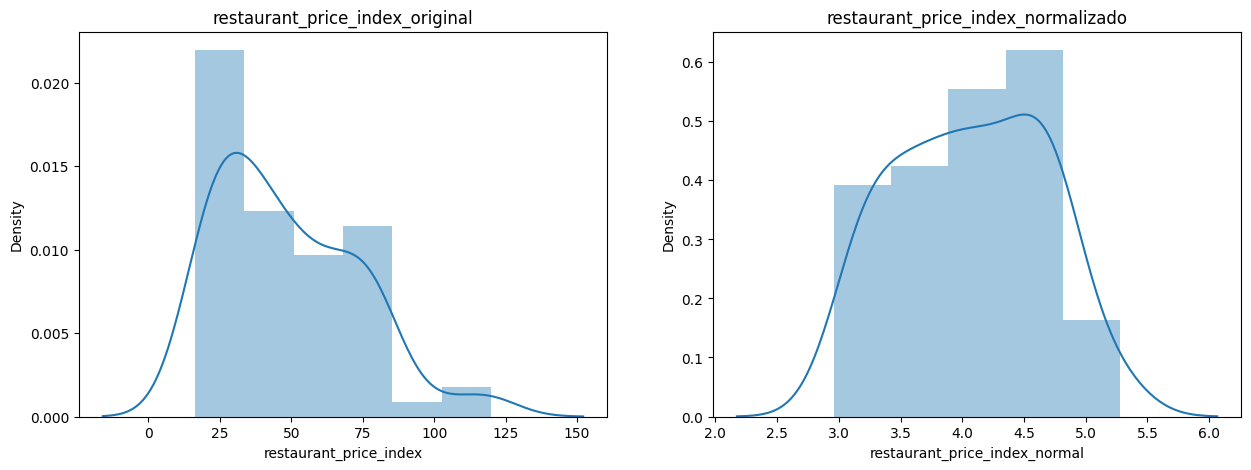

In [25]:

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('restaurant_price_index_original')
axes[1].set_title('restaurant_price_index_normalizado')

sns.distplot(df['restaurant_price_index'] ,ax = axes[0])
sns.distplot(df['restaurant_price_index_normal'], ax = axes[1]);

In [26]:
stats.shapiro(df['restaurant_price_index_normal'])

ShapiroResult(statistic=0.9615533351898193, pvalue=0.03889338672161102)

Aunque con el método boxcox nos hayamos acercado del la curva normal, el pvalue sigue siendo < 0.05, lo que sugiere que los datos no son normales. También lo hemos probado con los otros métodos, pero el pvalue sigue siendo < 0.05. 

- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [28]:
df.to_csv('datos/soci_econ_country_profiles_normalizado.csv')